## FLIGHT DELAY PREDICTION

## Predicting flight delays accurately can help airlines and passengers make informed decisions

## import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

## import data

In [2]:
df_2019 = pd.read_csv('jan_2019_ontime.csv')
df_2020 = pd.read_csv('jan_2020_ontime.csv')

## data cleaning

In [4]:
df_2019

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583980,31,4,UA,19977,UA,N776UA,200,12016,1201602,GUM,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
583981,31,4,UA,19977,UA,N36280,174,12016,1201602,GUM,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
583982,31,4,UA,19977,UA,N36280,117,14955,1495503,SPN,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN
583983,31,4,UA,19977,UA,N39726,105,14955,1495503,SPN,...,GUM,1820.0,0.0,1800-1859,1854.0,0.0,0.0,0.0,129.0,NaN


In [5]:
df_2020

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [7]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [9]:
df_2019.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [10]:
df_2020.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [14]:
columns_names =df_2020.columns
j=0
for i in df_2020.columns:
    print("{} has got {} null samples".format(df_2020.columns[j],df_2020[i].isnull().sum()))
    j = j+1


DAY_OF_MONTH has got 0 null samples
DAY_OF_WEEK has got 0 null samples
OP_UNIQUE_CARRIER has got 0 null samples
OP_CARRIER_AIRLINE_ID has got 0 null samples
OP_CARRIER has got 0 null samples
TAIL_NUM has got 698 null samples
OP_CARRIER_FL_NUM has got 0 null samples
ORIGIN_AIRPORT_ID has got 0 null samples
ORIGIN_AIRPORT_SEQ_ID has got 0 null samples
ORIGIN has got 0 null samples
DEST_AIRPORT_ID has got 0 null samples
DEST_AIRPORT_SEQ_ID has got 0 null samples
DEST has got 0 null samples
DEP_TIME has got 6664 null samples
DEP_DEL15 has got 6699 null samples
DEP_TIME_BLK has got 0 null samples
ARR_TIME has got 7075 null samples
ARR_DEL15 has got 8078 null samples
CANCELLED has got 0 null samples
DIVERTED has got 0 null samples
DISTANCE has got 0 null samples
Unnamed: 21 has got 607346 null samples


In [15]:
df_2020.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [17]:
!pip install missingno

## Data Exploration

<Axes: >

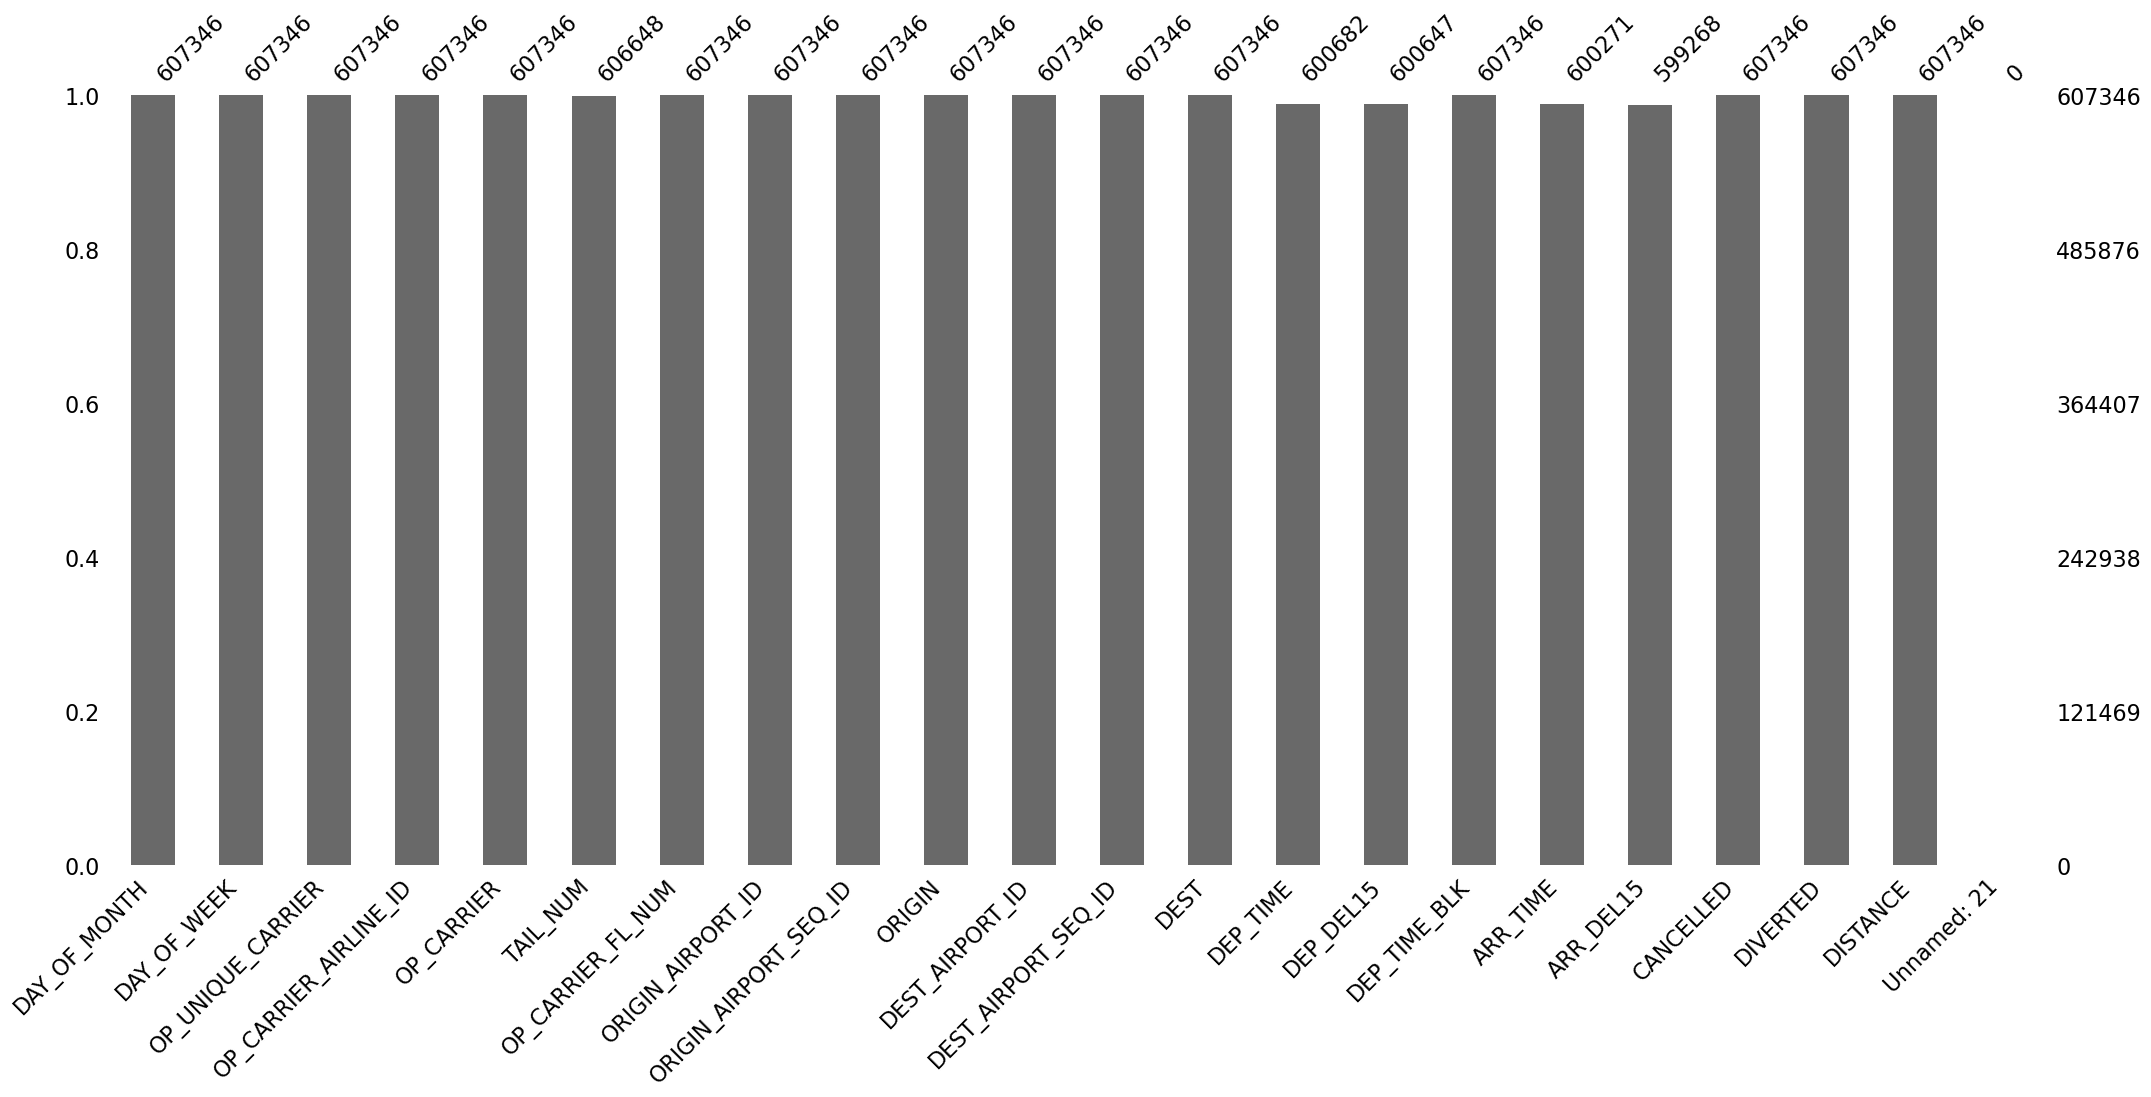

In [18]:
import missingno as msno
plt.figure(figsize=(4,4))
msno.bar(df_2020)

<Axes: >

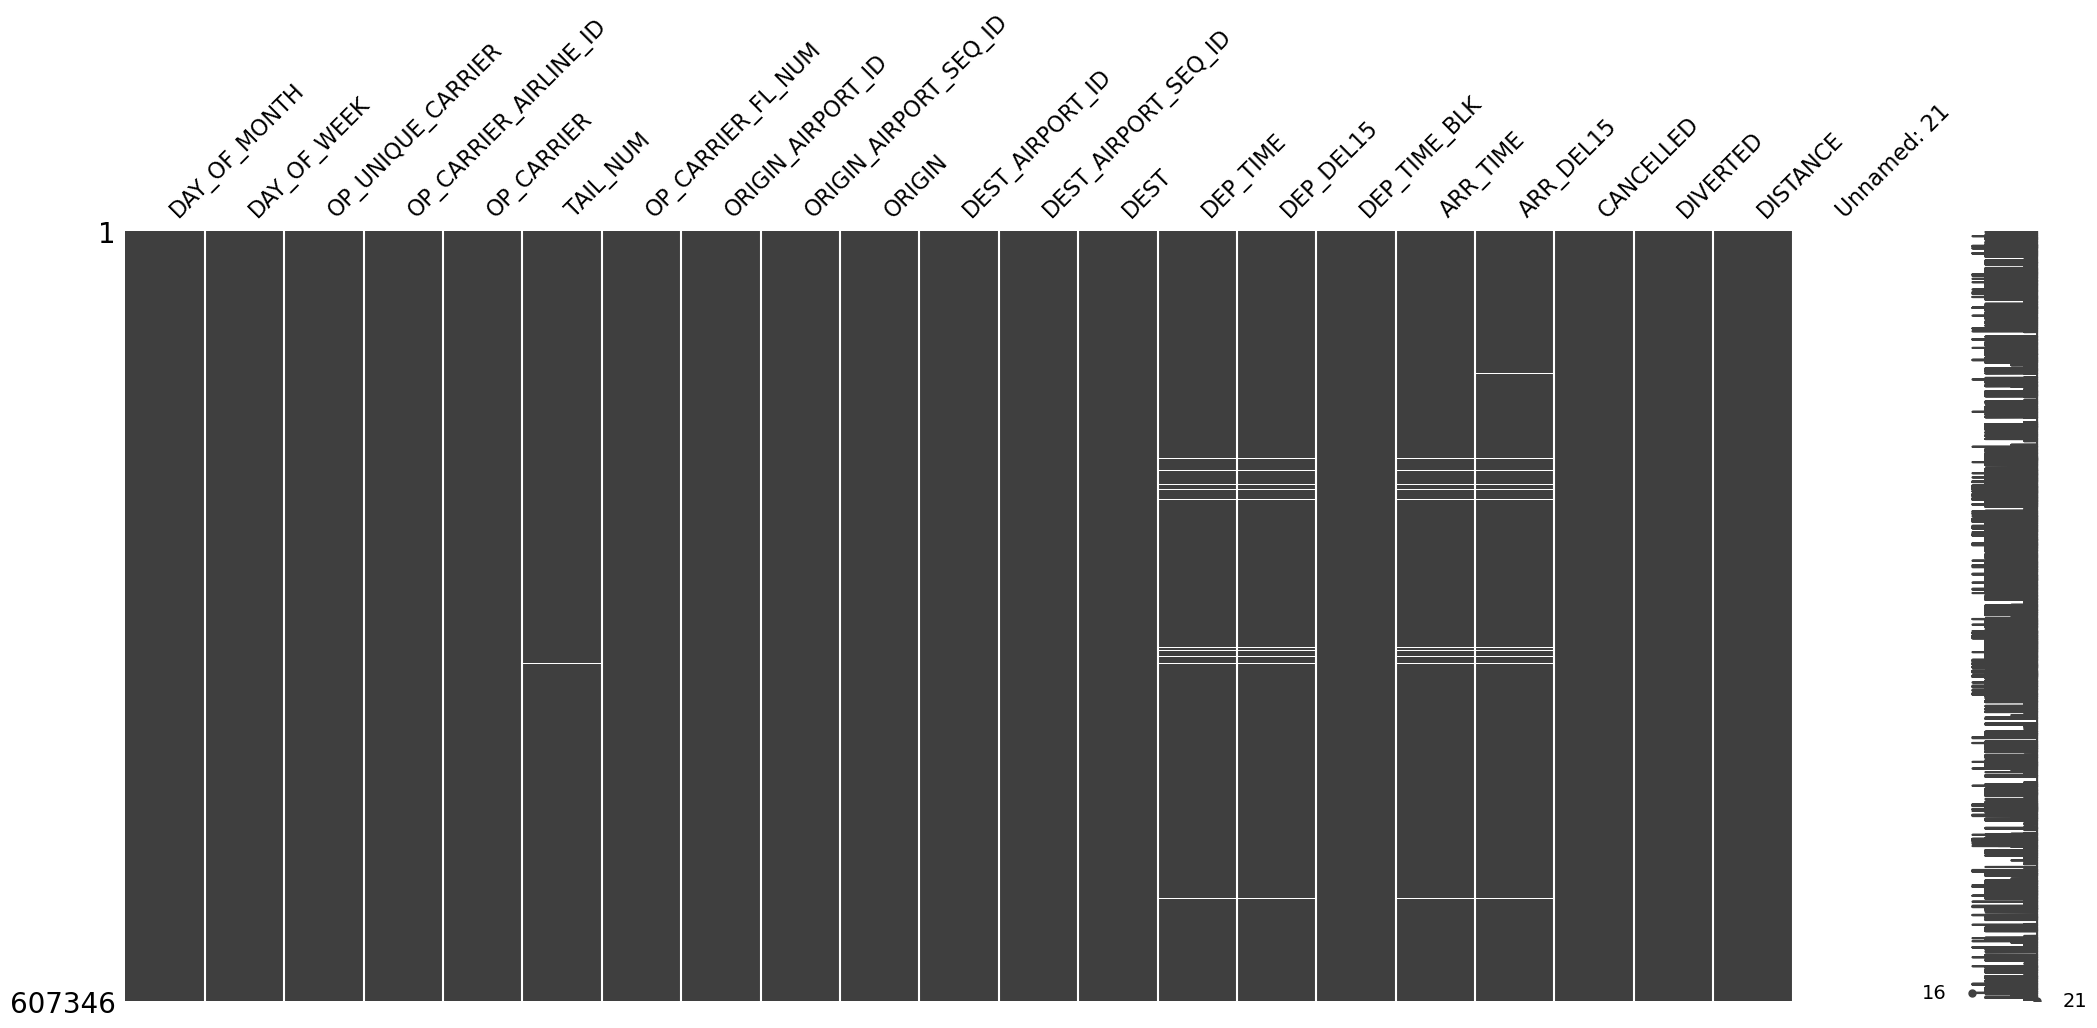

In [20]:
msno.matrix(df_2020)

<Axes: >

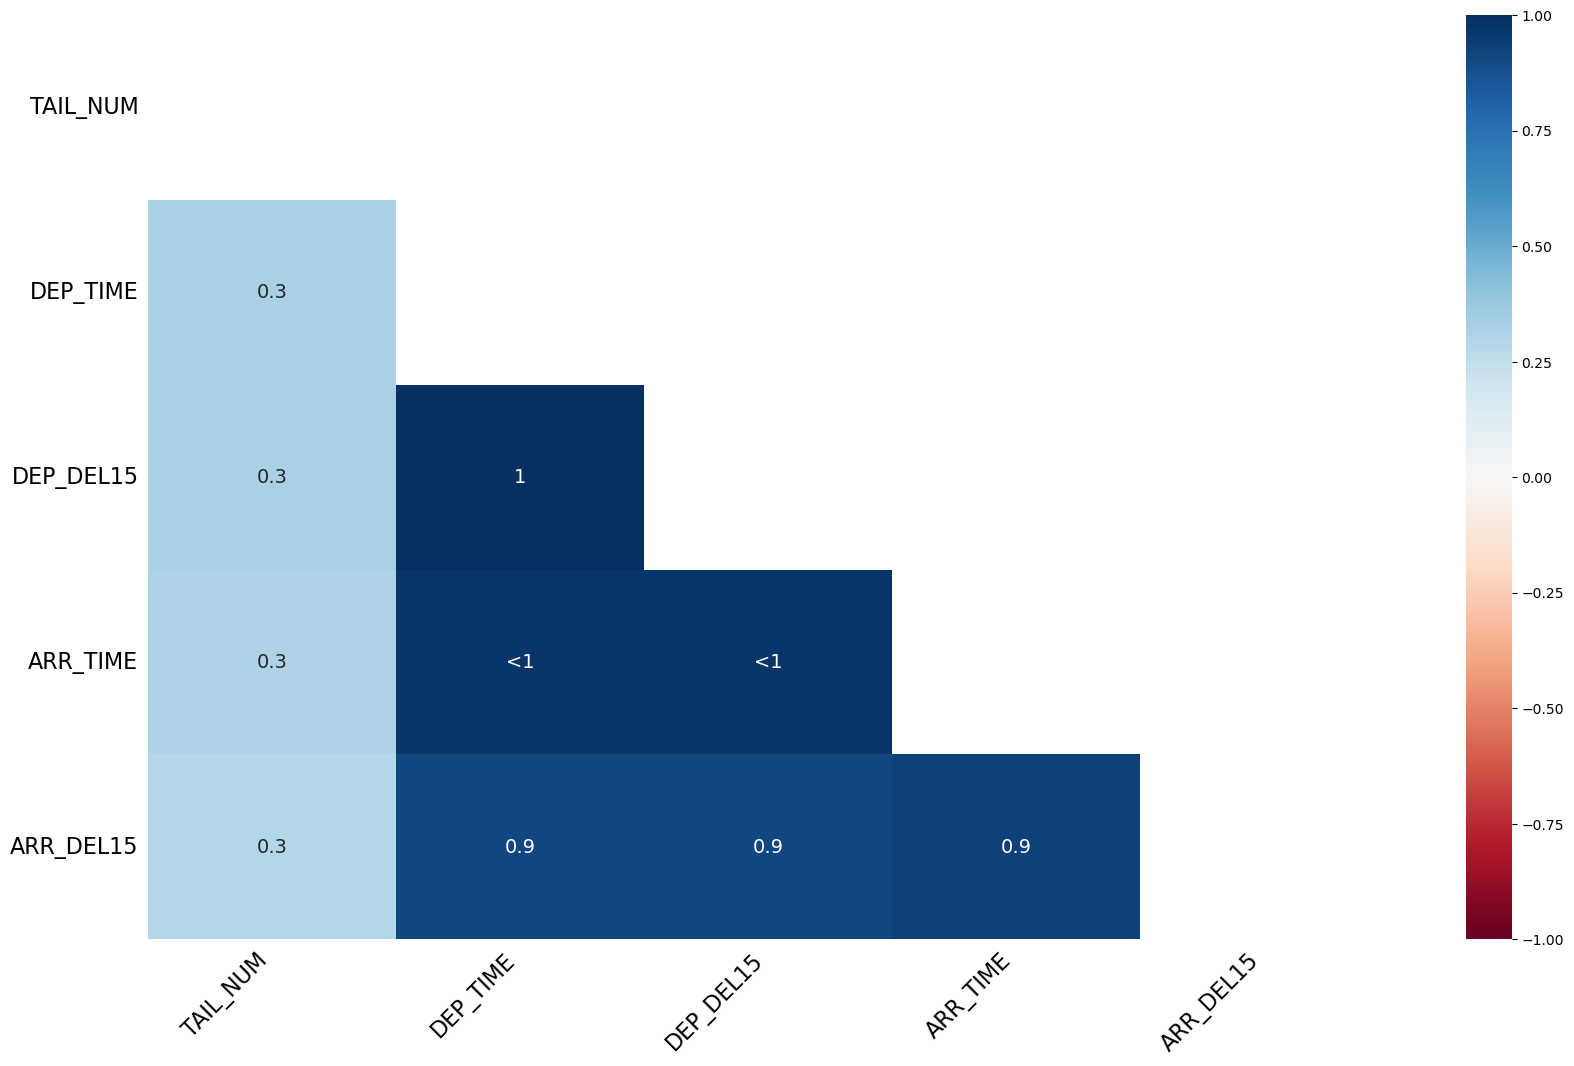

In [21]:
msno.heatmap(df_2020)

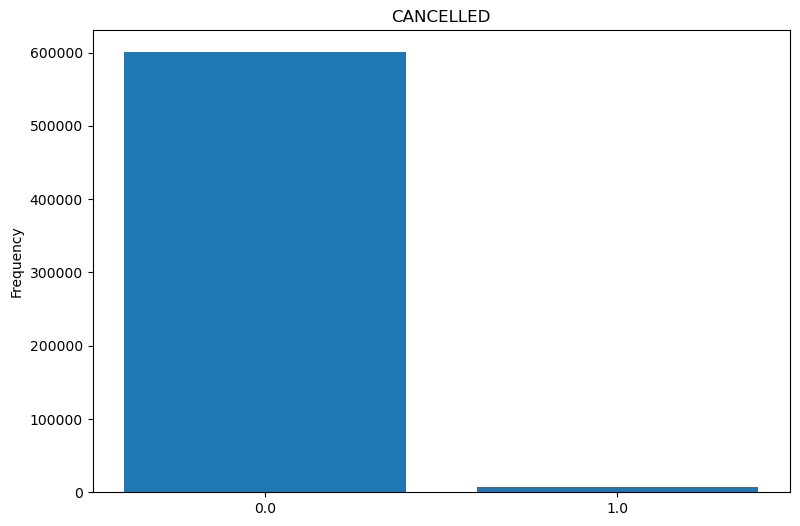

CANCELLED 
 0.0    600418
1.0      6928
Name: CANCELLED, dtype: int64


In [24]:
def bar_plot(variable):
    var = df_2020[variable] # get feature
    varValue = var.value_counts() # count number of categorical variable(value/sample)
    
    plt.figure(figsize = (9,6))
    plt.bar(varValue.index,varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{} \n {}".format(variable,varValue))
    
bar_plot('CANCELLED')

## PREPROCESSING

In [33]:
df_2020.shape

(607346, 21)

In [34]:
#Drop NaN TAIL_NUM rows
df_2020 = df_2020.dropna(subset=['TAIL_NUM'])
print(df_2020['TAIL_NUM'].isna().sum())
print(df_2020.shape)

0
(606648, 21)


In [35]:
## if delay is less than 15 min , we denote as not delay 0, apply for all NAN
df_2020['DEP_DEL15'] = df_2020['DEP_DEL15'].replace(np.NaN,0)
df_2020['DEP_DEL15'].isnull().sum()

C:\Users\91772\AppData\Local\Temp\ipykernel_13796\2294275280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['DEP_DEL15'] = df_2020['DEP_DEL15'].replace(np.NaN,0)


0

In [36]:
df_2020['ARR_DEL15'] = df_2020['ARR_DEL15'].replace(np.NaN,0)
df_2020['ARR_DEL15'].isnull().sum()

C:\Users\91772\AppData\Local\Temp\ipykernel_13796\2763667382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['ARR_DEL15'] = df_2020['ARR_DEL15'].replace(np.NaN,0)


0

## Here we fiiling missing values with "mean value of that columns"

In [37]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
#DEP_TIME

df_2020['DEP_TIME'] = imp_mean.fit_transform(df_2020[['DEP_TIME']])
#ARR_TIME

df_2020['ARR_TIME'] = imp_mean.fit_transform(df_2020[['ARR_TIME']])

C:\Users\91772\AppData\Local\Temp\ipykernel_13796\1023839386.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['DEP_TIME'] = imp_mean.fit_transform(df_2020[['DEP_TIME']])
C:\Users\91772\AppData\Local\Temp\ipykernel_13796\1023839386.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['ARR_TIME'] = imp_mean.fit_transform(df_2020[['ARR_TIME']])


In [38]:
column_names = df_2020.columns
j=0
for i in df_2020.columns:
    print("  {} has got {} NaN Sample " .format(df_2020.columns[j],df_2020[i].isnull().sum()))
    j=j+1

  DAY_OF_MONTH has got 0 NaN Sample 
  DAY_OF_WEEK has got 0 NaN Sample 
  OP_UNIQUE_CARRIER has got 0 NaN Sample 
  OP_CARRIER_AIRLINE_ID has got 0 NaN Sample 
  OP_CARRIER has got 0 NaN Sample 
  TAIL_NUM has got 0 NaN Sample 
  OP_CARRIER_FL_NUM has got 0 NaN Sample 
  ORIGIN_AIRPORT_ID has got 0 NaN Sample 
  ORIGIN_AIRPORT_SEQ_ID has got 0 NaN Sample 
  ORIGIN has got 0 NaN Sample 
  DEST_AIRPORT_ID has got 0 NaN Sample 
  DEST_AIRPORT_SEQ_ID has got 0 NaN Sample 
  DEST has got 0 NaN Sample 
  DEP_TIME has got 0 NaN Sample 
  DEP_DEL15 has got 0 NaN Sample 
  DEP_TIME_BLK has got 0 NaN Sample 
  ARR_TIME has got 0 NaN Sample 
  ARR_DEL15 has got 0 NaN Sample 
  CANCELLED has got 0 NaN Sample 
  DIVERTED has got 0 NaN Sample 
  DISTANCE has got 0 NaN Sample 


## As per importance of the labels we fill the NaN values some are with mean, and some are with zero

## correclation Matric

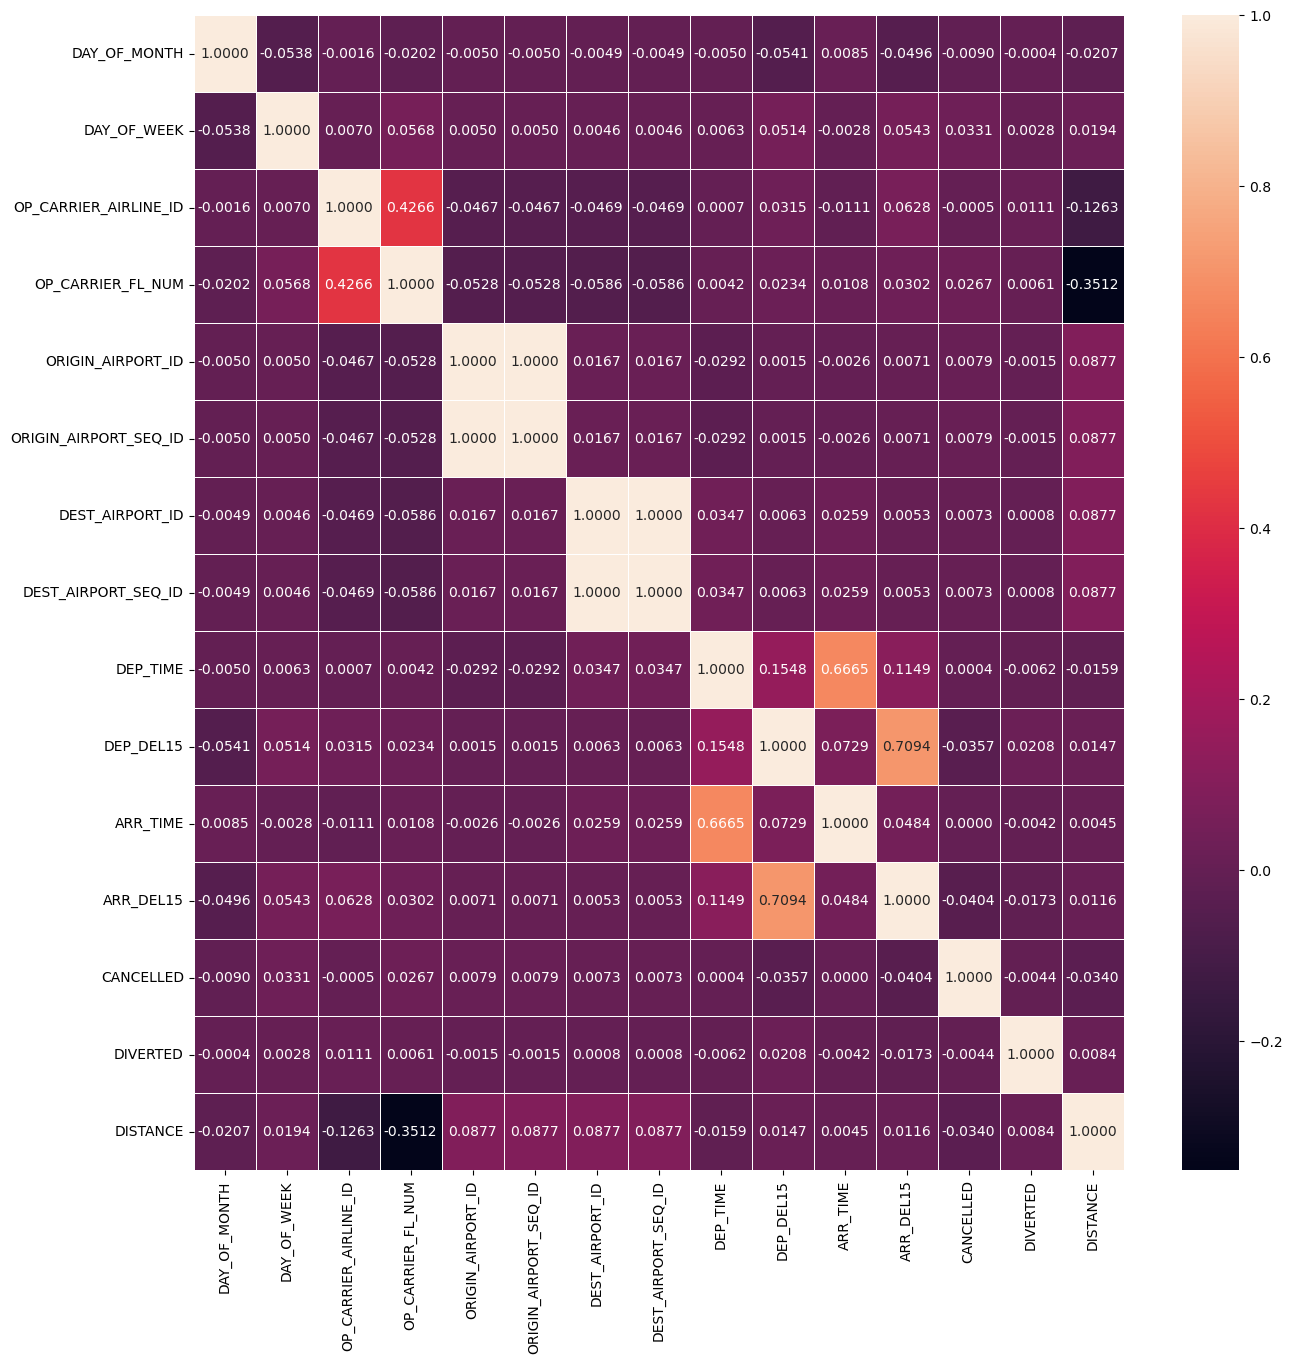

In [39]:
import seaborn as sns
f,ax= plt.subplots(figsize=(15,15))
sns.heatmap(df_2020.corr(),linewidths=.5,annot=True,fmt='.4f',ax=ax)
plt.show()

## Above relation says that relation between DEST_AIRPORT_ID - DEST_AIRPORT_SEQ_ID  and  ORIGIN_AIRPORT_ID - ORIGIN_AIRPORT_SEQ_ID 
## so we drop each one of them

In [40]:
df_2020 = df_2020.drop(['DEST_AIRPORT_SEQ_ID'],axis=1)
df_2020 = df_2020.drop(['ORIGIN_AIRPORT_SEQ_ID'],axis=1)
print(df_2020.shape)

(606648, 19)


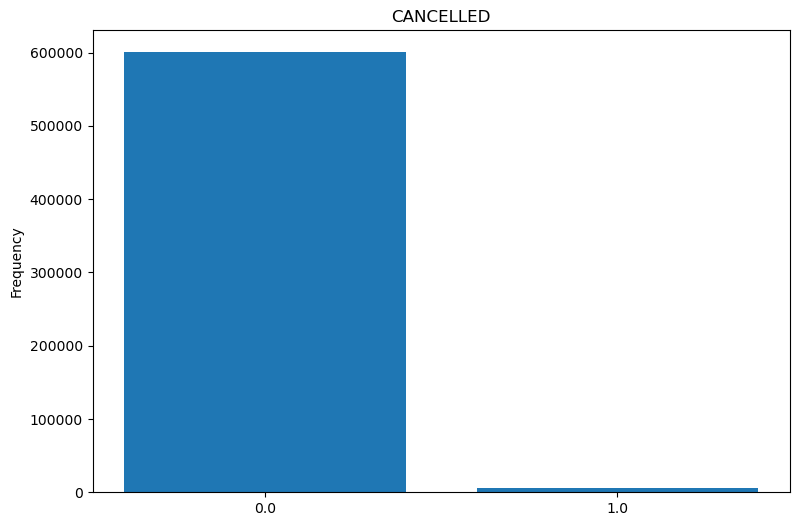

CANCELLED 
 0.0    600418
1.0      6230
Name: CANCELLED, dtype: int64


In [41]:
bar_plot('CANCELLED')

## preparation for model

In [42]:
y = df_2020.CANCELLED
df_2020 = df_2020.drop('CANCELLED',axis=1)
X = df_2020

In [43]:
categorical_columns = ['OP_CARRIER','OP_UNIQUE_CARRIER','TAIL_NUM','ORIGIN','DEST','DEP_TIME_BLK']
for col in categorical_columns:
    X_encoded = pd.get_dummies(X[col],prefix_sep = '_')
    df_2020 = df_2020.drop([col],axis=1)

df_2020 = pd.concat([df_2020, X_encoded], axis=1)

In [46]:
X_encoded

,0001-0559,0600-0659,0700-0759,0800-0859,0900-0959,1000-1059,1100-1159,1200-1259,1300-1359,1400-1459,1500-1559,1600-1659,1700-1759,1800-1859,1900-1959,2000-2059,2100-2159,2200-2259,2300-2359
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607342,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
607343,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
607344,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [47]:
x = df_2020

In [50]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,shuffle=True,random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state = 0)
model_dt = clf_dt.fit(X_train, y_train) 

[Text(0.6, 0.875, 'x[8] <= 1488.984\ngini = 0.02\nsamples = 424653\nvalue = [420325, 4328]'),
 Text(0.4, 0.625, 'x[8] <= 1468.484\ngini = 0.04\nsamples = 209452\nvalue = [205124, 4328]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 205019\nvalue = [205019, 0]'),
 Text(0.6, 0.375, 'x[10] <= 0.5\ngini = 0.046\nsamples = 4433\nvalue = [105, 4328]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 4328\nvalue = [0, 4328]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 105\nvalue = [105, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 215201\nvalue = [215201, 0]')]

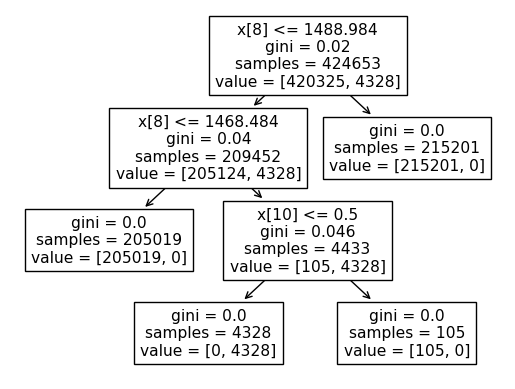

In [52]:
from sklearn import tree
tree.plot_tree(model_dt) 

In [53]:
from sklearn import metrics
y_pred = model_dt.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      1.00      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



In [54]:
y_test.value_counts()

0.0    180093
1.0      1902
Name: CANCELLED, dtype: int64

In [55]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=50)
model_rf = clf_rf.fit(X_train, y_train)

In [57]:
from sklearn import metrics
y_pred = model_rf.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      0.99      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



In [56]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = RandomForestClassifier()
model_ab = clf_ab.fit(X_train, y_train)

In [58]:
from sklearn import metrics
y_pred = model_ab.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      0.99      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



In [59]:
import xgboost as xgb
clf_xgb = xgb.XGBClassifier()
model_xgb = clf_xgb.fit(X_train, y_train)

In [60]:
from sklearn import metrics
y_pred = model_xgb.predict(X_test)
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    180093
         1.0       1.00      1.00      1.00      1902

    accuracy                           1.00    181995
   macro avg       1.00      1.00      1.00    181995
weighted avg       1.00      1.00      1.00    181995



# Use the selected model to predict flight cancellations for new or upcoming flights, providing valuable insights for airlines, passengers, and airports.

## HERE IT SHOWS ALL MODELS ARE GIVING THE SAME PREDICTION